In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bls = pd.read_csv("C:/Users/kesdr/Downloads/bls_data.csv")
print(bls.head())

              series_id  year period  value     footnotes
0  LAUMT063108000000003  2024    M11    5.4  Preliminary.
1  LAUMT063108000000003  2024    M10    5.6           NaN
2  LAUMT063108000000003  2024    M09    5.5           NaN
3  LAUMT063108000000003  2024    M08    6.2           NaN
4  LAUMT063108000000003  2024    M07    6.0           NaN


In [4]:
print('Number of instances = %d' % (bls.shape[0]))
print('Number of attributes = %d' % (bls.shape[1]))

Number of instances = 524
Number of attributes = 5


In [5]:
print('Number of missing values:')
for col in bls.columns:
    print(f'{col}: {bls[col].isna().sum()}')

Number of missing values:
series_id: 0
year: 0
period: 0
value: 0
footnotes: 520


In [6]:
blsdrop = bls.drop(columns=['footnotes'])
blsdrop

,series_id,year,period,value
0,LAUMT063108000000003,2024,M11,5.4
1,LAUMT063108000000003,2024,M10,5.6
2,LAUMT063108000000003,2024,M09,5.5
3,LAUMT063108000000003,2024,M08,6.2
4,LAUMT063108000000003,2024,M07,6.0
...,...,...,...,...
519,LAUMT063108000000006,2014,M05,6523953.0
520,LAUMT063108000000006,2014,M04,6505721.0
521,LAUMT063108000000006,2014,M03,6544226.0
522,LAUMT063108000000006,2014,M02,6527749.0


In [7]:
print('Number of missing values:')
for col in blsdrop.columns:
    print(f'{col}: {blsdrop[col].isna().sum()}')

Number of missing values:
series_id: 0
year: 0
period: 0
value: 0


In [8]:
print(f"Duplicate rows: {blsdrop.duplicated().sum()}")

Duplicate rows: 0


In [9]:
#EDA

In [10]:
blsdrop['year'] = blsdrop['year'].astype(int)
blsdrop['value'] = blsdrop['value'].astype(float)
blsdrop['month'] = blsdrop['period'].str.extract('(\d+)').astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kesdr\AppData\Local\Temp\ipykernel_46628\2370633528.py:3: SyntaxWarning: invalid escape sequence '\d'
  blsdrop['month'] = blsdrop['period'].str.extract('(\d+)').astype(int)


In [11]:
#to look at the month
blsdrop['date'] = pd.to_datetime(blsdrop['year'].astype(str) + '-' + blsdrop['month'].astype(str) + '-01')
print(blsdrop.head())

              series_id  year period  value  month       date
0  LAUMT063108000000003  2024    M11    5.4     11 2024-11-01
1  LAUMT063108000000003  2024    M10    5.6     10 2024-10-01
2  LAUMT063108000000003  2024    M09    5.5      9 2024-09-01
3  LAUMT063108000000003  2024    M08    6.2      8 2024-08-01
4  LAUMT063108000000003  2024    M07    6.0      7 2024-07-01


In [12]:
#descriptive stats for value 
print(blsdrop['value'].describe())

count    5.240000e+02
mean     3.312406e+06
std      3.127834e+06
min      3.700000e+00
25%      1.856250e+05
50%      3.123469e+06
75%      6.493090e+06
max      6.925383e+06
Name: value, dtype: float64


In [13]:
#determining unique series id values
print("Unique series_id values:", blsdrop['series_id'].unique())

Unique series_id values: ['LAUMT063108000000003' 'LAUMT063108000000004' 'LAUMT063108000000005'
 'LAUMT063108000000006']


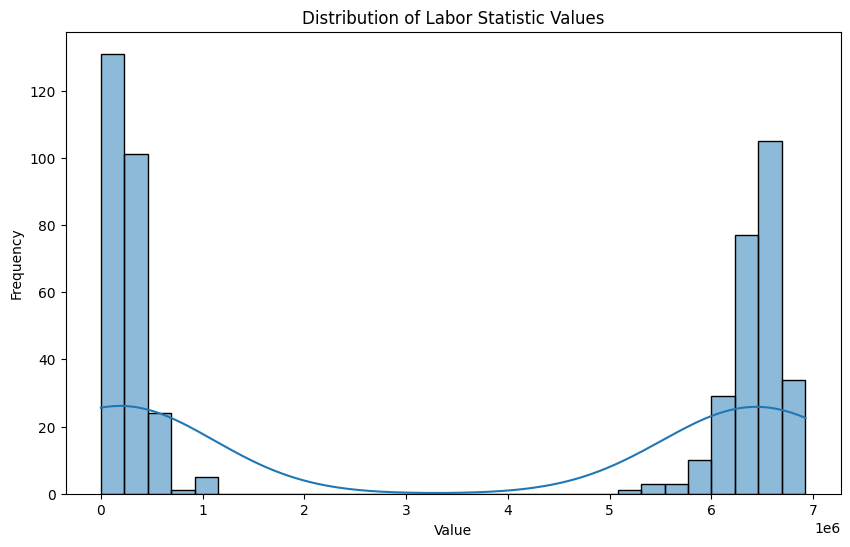

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(blsdrop['value'], bins=30, kde=True)
plt.title('Distribution of Labor Statistic Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [22]:
series_mapping = {
    'LAUMT063108000000003': 'Unemployment Rate (%)',
    'LAUMT063108000000004': 'Number of Unemployed Persons',
    'LAUMT063108000000005': 'Number of Employed Persons',
    'LAUMT063108000000006': 'Total Labor Force'
}

In [23]:
blsdrop['series_label'] = blsdrop['series_id'].map(series_mapping)

In [25]:
annual_mean = blsdrop.groupby(['year', 'series_label'])['value'].mean().reset_index()
print(annual_mean)

    year                  series_label         value
0   2014    Number of Employed Persons  6.050647e+06
1   2014  Number of Unemployed Persons  4.972112e+05
2   2014             Total Labor Force  6.547858e+06
3   2014         Unemployment Rate (%)  7.600000e+00
4   2015    Number of Employed Persons  6.154113e+06
5   2015  Number of Unemployed Persons  4.039380e+05
6   2015             Total Labor Force  6.558051e+06
7   2015         Unemployment Rate (%)  6.158333e+00
8   2016    Number of Employed Persons  6.283934e+06
9   2016  Number of Unemployed Persons  3.324338e+05
10  2016             Total Labor Force  6.616368e+06
11  2016         Unemployment Rate (%)  5.033333e+00
12  2017    Number of Employed Persons  6.413122e+06
13  2017  Number of Unemployed Persons  3.024748e+05
14  2017             Total Labor Force  6.715597e+06
15  2017         Unemployment Rate (%)  4.508333e+00
16  2018    Number of Employed Persons  6.450601e+06
17  2018  Number of Unemployed Persons  2.8538

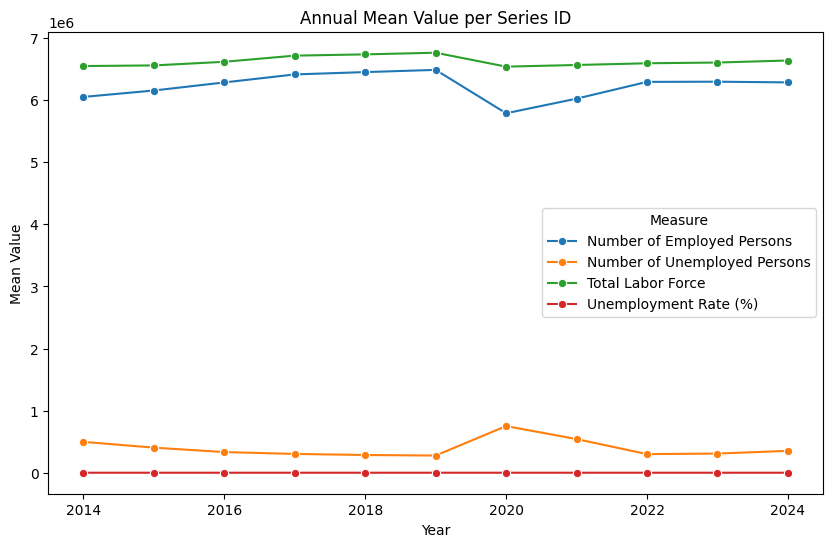

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_mean, x='year', y='value', hue='series_label', marker="o")
plt.title('Annual Mean Value per Series ID')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend(title='Measure')
plt.show()

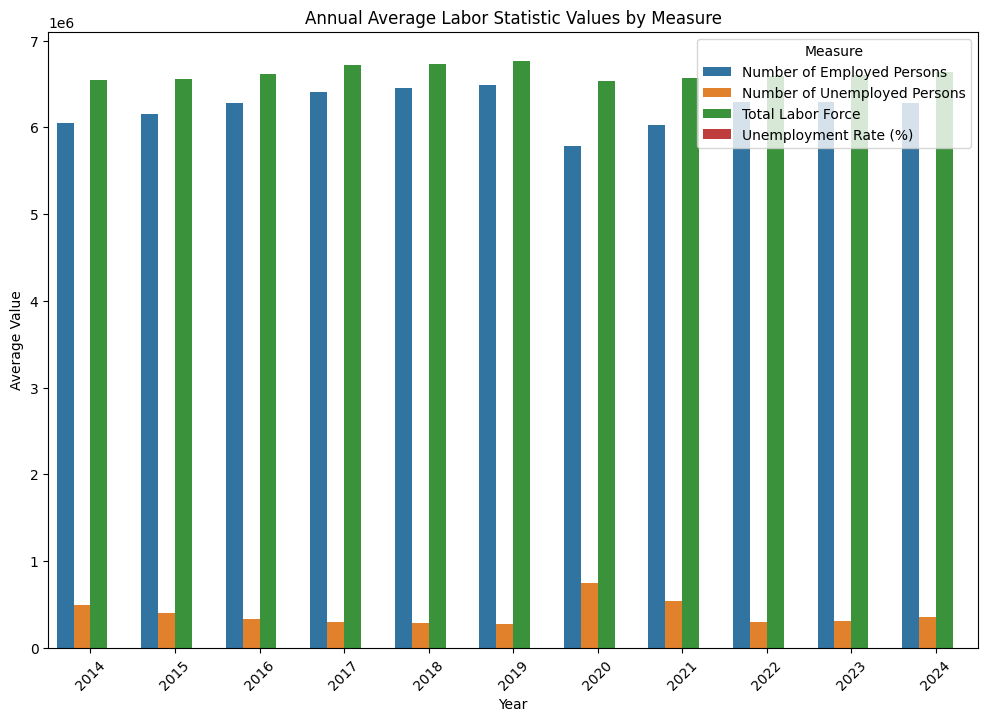

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(data=annual_mean, x='year', y='value', hue='series_label')
plt.title('Annual Average Labor Statistic Values by Measure')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Measure')
plt.show()

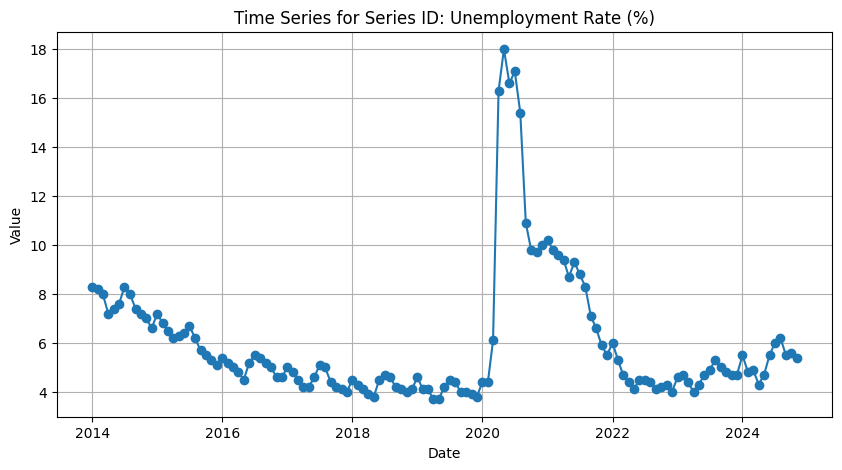

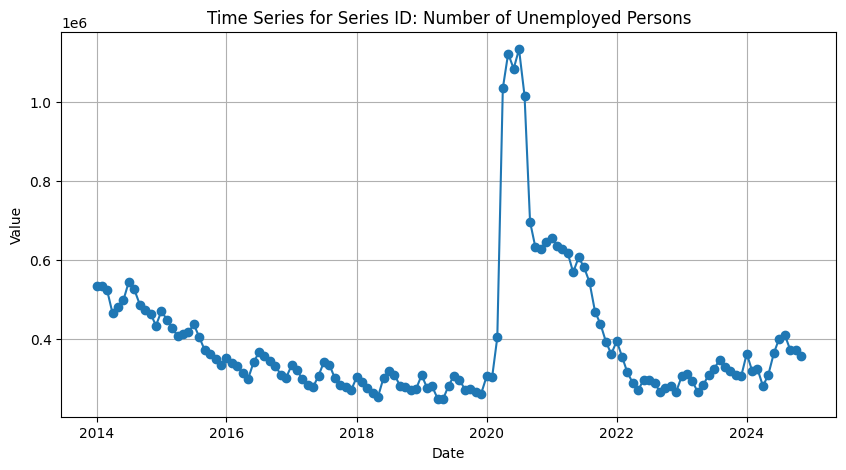

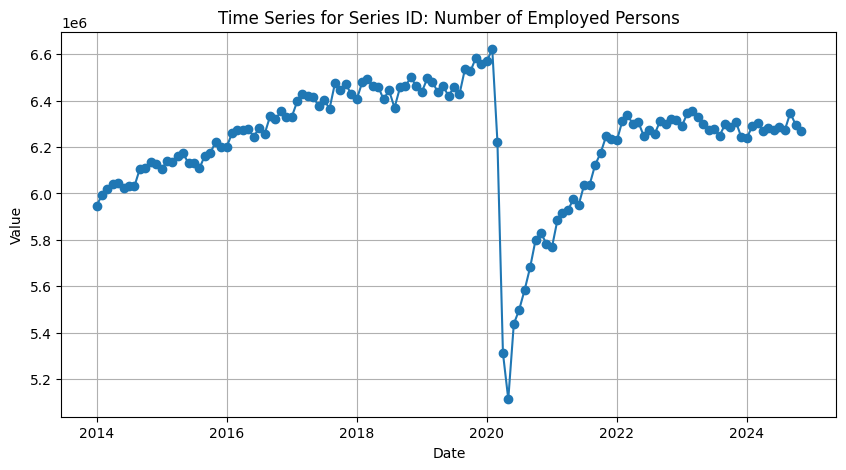

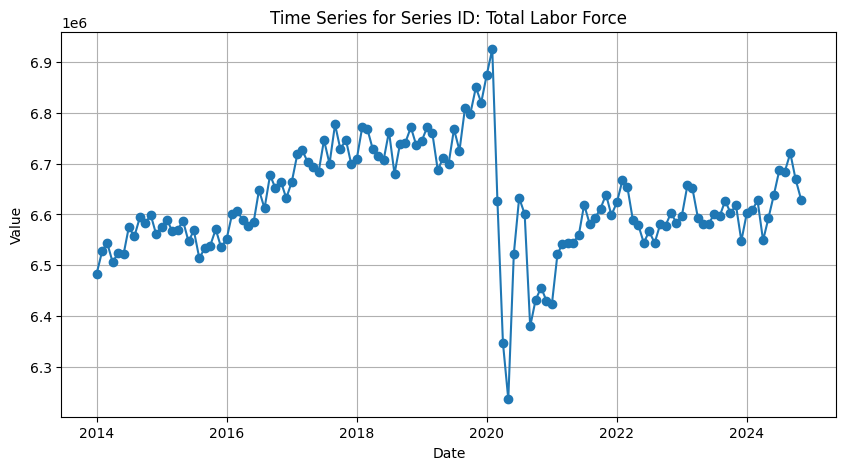

In [33]:
unique_series = blsdrop['series_label'].unique()

for sid in unique_series:
    subset = blsdrop[blsdrop['series_label'] == sid].sort_values('date')
    plt.figure(figsize=(10, 5))
    plt.plot(subset['date'], subset['value'], marker='o', linestyle='-')
    plt.title(f"Time Series for Series ID: {sid}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()